# Bike Sharing Data Set - Final Project

There are 2 datasets within this project:
- day.csv
- hour.csv

Lets inspeact each of them separetely

### Team Members and Responsibilities:

Assign clear responsibilities (e.g., data visualization, specific algorithms, grid search).

matplotlib for data visualization, scikit-learn standard methods and use of gridsearch.

### Task clarification

Investigation goals.

Hypotheses before the investigation.

Quality criteria (e.g., target score or type of score).

Type of machine learning methods used.

Roadmap for the investigation process.

goals: predict the number of bikes rented (continous variable, therefore a regression problem) on a given day based on the posible features
hypotesis: features such as weather (rain, cold, humidity) and day (weekend, holiday) have direct impact on how many bikes are rented a given day
    ``temp``, ``atemp``, ``hum``, ``windspeed``, ``season``, ``holiday``, ``weekday``, ``workingday``, and ``weathersit`` are likely predictors.
    ``instant`` and ``dteday`` might be non-predictors
    Might be best to use one-hot encoding for ``season`` and ``weathersit``
quality criteria: R2 score (`r2_score`) and or MSE (`mean_squared_error `)

type of machine learning: test multiple such as 
    - linear regression (baseline), 
    - decision tree regressor (non-linear relationships), 
    - Random Forest Regressor (Reduce overfitting, ensemble method), 
    - Gradient Boosting Regressor (For fine-tuned performance), 
    - Support Vector Regressor (SVR) (If data is scaled)
    
roadmap for the investigation process: pipeline using `StandardScaler` and `MinMaxScaler` then fitting models on the training data

2.3 -> Data dictionary and further code until visual correlation provided above


Data Dictionary




Column   Position
Atrribute Name
Definition
Data Type
Example
% Null Ratios




1
instant
Record Index
Quantitative
190, 7, 17180
0


2
dteday
Date (Format: YYYY-MM-DD)
Quantitative
2012-12-23, 2012-01-01, 2012-06-24
0


3
season
Season (1:   springer, 2: summer, 3: fall, 4: winter)
Quantitative
1, 2, 4
0


4
yr
Year (0: 2011,   1:2012)
Quantitative
0, 1
0


5
mnth
Month (1 to 12)
Quantitative
1, 6, 12
0


6
hr
Hour (0 to 23) - Not in day.csv dataset
Quantitative
4, 6, 14
0


7
holiday
Weather day is   holiday or not
Quantitative
0, 1
0


8
weekday
Day of the   week
Quantitative
0, 6, 3
0


9
workingday
Working Day: If day is neither weekend nor holiday is 1, otherwise is 0
Quantitative
0, 1
0


10
weathersit
Weather Situation (1: Clear, Few   clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog)
Quantitative
1, 2, 3
0


11
temp
Normalized   temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min),   t_min=-8, t_max=+39 (only in hourly scale)
Quantitative
0.08, 0.22, 0.34
0


12
atemp
Normalized   feeling temperature in Celsius. The values are derived via   (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
Quantitative
0.0909, 0.2727, 0.303
0


13
hum
Normalized humidity. The values are divided to 100 (max)
Quantitative
0.53, 0.8, 0.31
0


14
windspeed
Normalized wind speed. The values are divided to 67 (max)
Quantitative
0.194, 0, 0.2985
0


15
casual
Count of casual users
Quantitative
0, 2, 57
0


16
registered
Count of   registered users
Quantitative
1, 0, 118
0


17
cnt
Count of total rental bikes including both casual and registered
Quantitative
1, 2, 175
0

In [3]:
# Import Required Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and examining the day.csv dataset
day_df = pd.read_csv("day.csv")

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


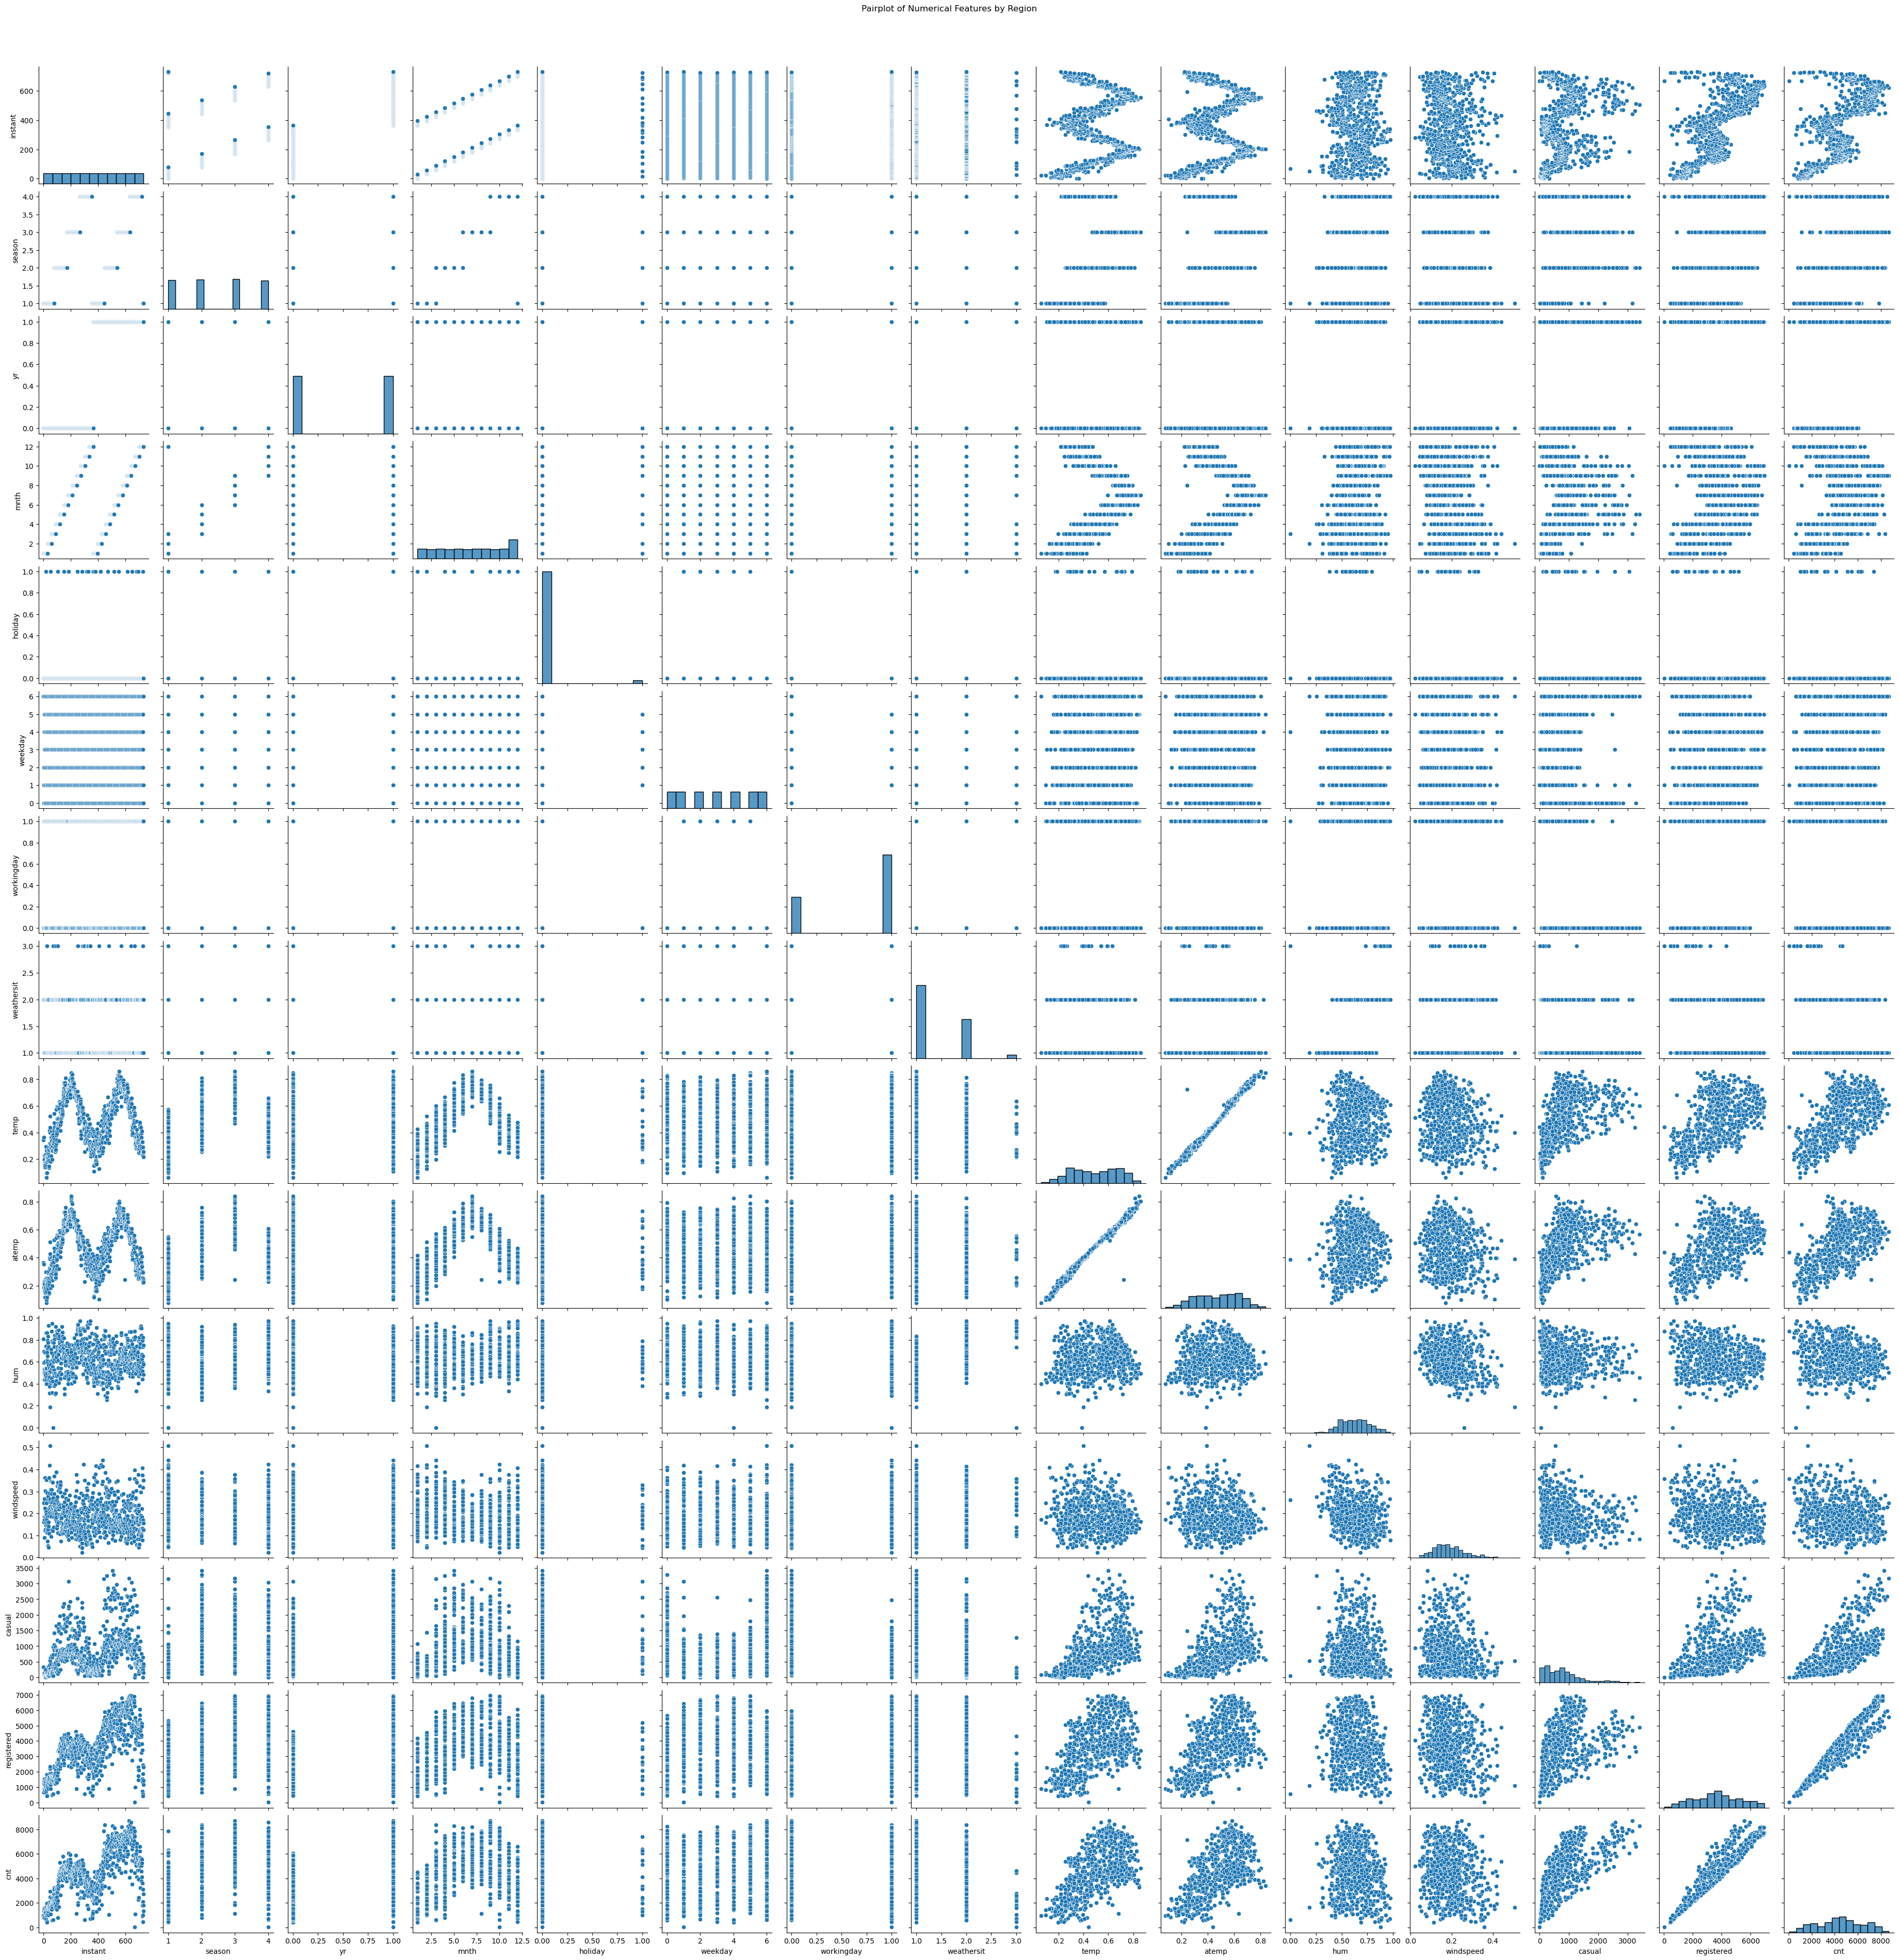

In [8]:
# Pairplot to visualize distributions and relationships
sns.pairplot(day_df)
plt.suptitle("Pairplot of Numerical Features by Region", y=1.02)
plt.show()


### 4. Data Preparation

Imputation and scaling methods.

Feature selection or engineering.

PCA and the percentage of variance retained.

Dataset subdivision for homogeneity.

2.4 -> No NaN values so no need for imputer, investigate if we can drop features and simplify using PCA retaining variance. Dataset subdivision using crossvalidation.

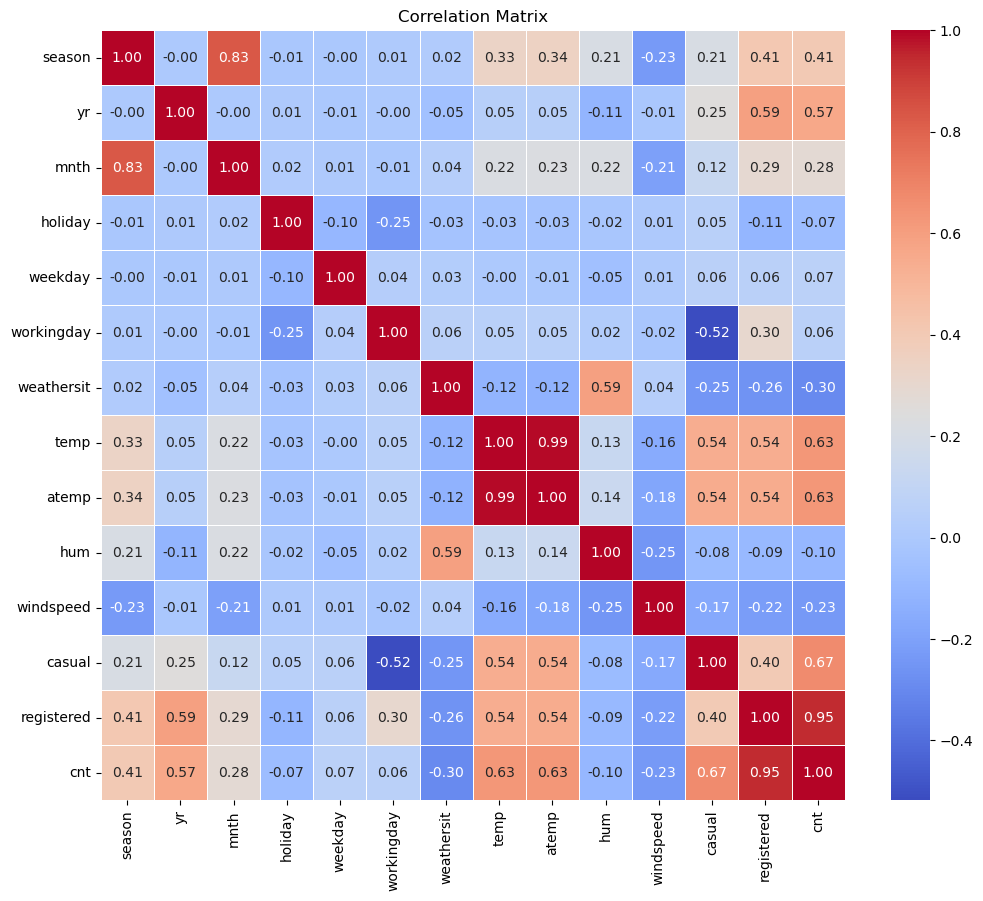

In [10]:
day_df_clean = day_df.drop(['instant', 'dteday'], axis=1)  # Adjust if needed

# Compute the Correlation Matrix
corr_matrix = day_df_clean.corr()

# Plot the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We note that season (`season`) and month (`mnth`) have strong correlation (0.83). Also ``registered`` and ``cnt`` have a very strong correlation (0.95) to our target. Humidity and weather situation have a correlation of 0.59 probably because if it is reaining or snowing the humidity is high. Working day and casual have negative correlation of -0.52. Temperature and atemperature have 0.33 and 0.34


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(day_df_clean)

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

# Calculate Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Print Variance Ratios
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance Ratio:", cumulative_variance)


Explained Variance Ratio: [0.30397105 0.14658686 0.11436124 0.0924604  0.08421002 0.07485539
 0.06540379 0.05860971 0.02267846 0.0175043  0.01130591 0.00749158
 0.00056129 0.        ]
Cumulative Variance Ratio: [0.30397105 0.45055791 0.56491914 0.65737954 0.74158956 0.81644495
 0.88184875 0.94045846 0.96313692 0.98064122 0.99194714 0.99943871
 1.         1.        ]


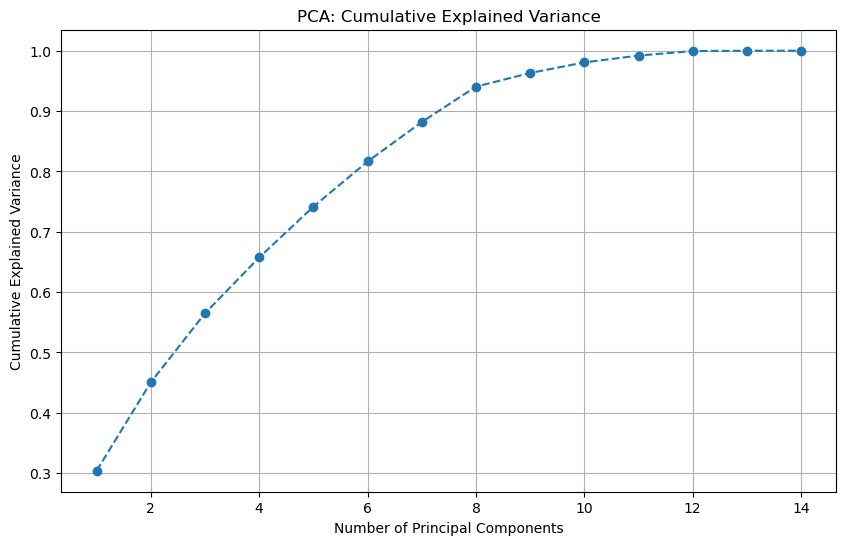

In [12]:
# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid()
plt.show()


In [13]:
# Get PCA loadings (eigenvectors)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=day_df_clean.columns)

# Display the loadings
print("PCA Loadings:")
print(loadings)


PCA Loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
season      0.279836  0.377429 -0.020833  0.404269 -0.211772  0.056704   
yr          0.192503 -0.264965  0.221693  0.242538  0.620326 -0.050298   
mnth        0.223135  0.402233 -0.030504  0.478599 -0.195674  0.075955   
holiday    -0.024608 -0.036028 -0.402549  0.213856  0.128815 -0.328484   
weekday     0.020655 -0.033098  0.116708 -0.039271 -0.021245  0.872827   
workingday  0.008367  0.106969  0.684407 -0.139059 -0.186031 -0.211319   
weathersit -0.125772  0.440930  0.047762 -0.199444  0.484990  0.104991   
temp        0.390799  0.060605 -0.098922 -0.430279 -0.162418 -0.077938   
atemp       0.393509  0.069233 -0.099221 -0.425870 -0.159908 -0.084265   
hum         0.013996  0.542473 -0.054244 -0.226686  0.367168 -0.026848   
windspeed  -0.155674 -0.205316  0.032981 -0.068228 -0.075857  0.080990   
casual      0.331716 -0.184569 -0.411998 -0.075427  0.128611  0.194312   
registered  0.414692 -0.

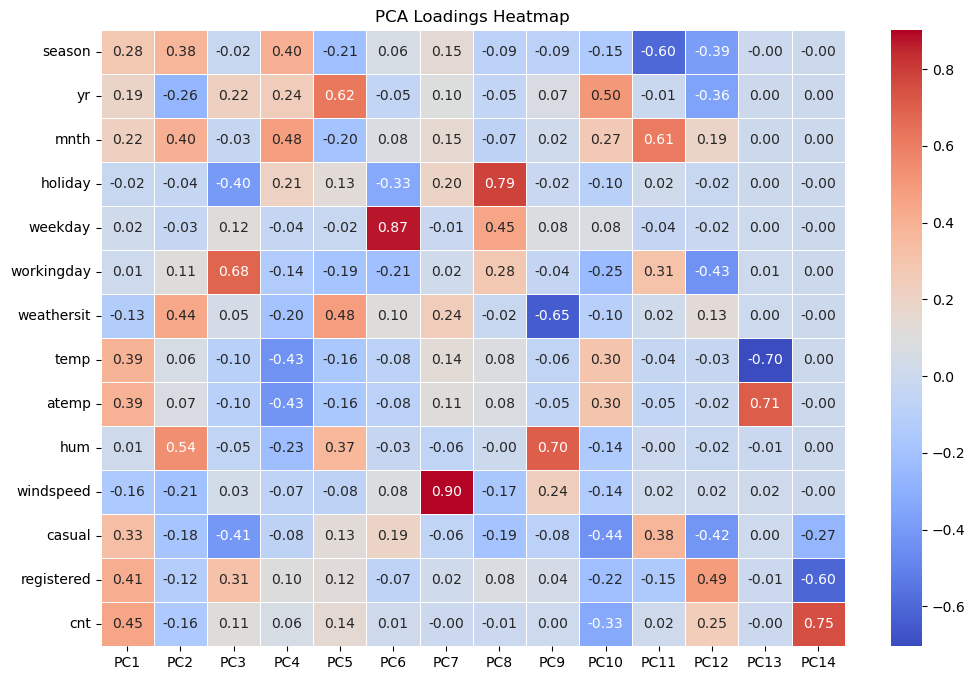

In [14]:
# Heatmap of Loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("PCA Loadings Heatmap")
plt.show()


### Algorithm Applications:

Test 3-5 algorithms.
Justify algorithm choice and calculate scores on training data.
Notes on underfitting and overfitting.
Perform cross-validation and report results.

2.5 -> Select 3-5 algorithms to inspect justifying choise.
        - linear regression (baseline), 
        - decision tree regressor (non-linear relationships), 
        - Random Forest Regressor (Reduce overfitting, ensemble method), 
        - Gradient Boosting Regressor (For fine-tuned performance), 
        - Support Vector Regressor (SVR) (If data is scaled)



2.6 -> Grid Search

2.7 -> Ensemble Metyhods

2.8 -> Score Table

2.9 -> Final Comments

2.10 -> Reusable functions (?)

2.11 -> Miscellaneous Other relevant aspects not covered above.(???)
